In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装
    
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    
    def __init__(self, num_iter, lr, no_bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass
        
    def predict(self, X):
        """
        線形回帰を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        pass
        return

# 問題1　仮定関数

In [3]:
x1=np.array([0,1,2,3,4,5,6,7,8,9])

print(x1)

[0 1 2 3 4 5 6 7 8 9]


In [4]:
# bias
x0 = np.ones(x1.shape[0])
x0

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [5]:
x0.reshape(-1,1)

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [6]:
x0.reshape(1,-1)

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [7]:
X = np.concatenate([x0.reshape(-1,1), x1.reshape(-1,1)], axis=1)
X

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.],
       [1., 6.],
       [1., 7.],
       [1., 8.],
       [1., 9.]])

In [8]:
theta = np.random.random(X.shape[1])
theta

array([0.29872331, 0.06596646])

In [9]:
pred = X@theta
pred

array([0.29872331, 0.36468977, 0.43065623, 0.49662269, 0.56258915,
       0.62855561, 0.69452206, 0.76048852, 0.82645498, 0.89242144])

In [10]:
pred.shape

(10,)

In [11]:
def linear_hypothesis(X):
    """
    線形の仮定関数を計算する

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ

    Returns
    -------
      次の形のndarray, shape (n_samples, 1)
      線形の仮定関数による推定結果

    """
    x1 = X
    # bias
    x0 = np.ones(X.shape[0])
    X = np.concatenate([x0.reshape(-1,1), x1], axis=1)
    theta = np.random.random(X.shape[1])
    pred = X@theta
    return pred

In [12]:
X=np.array([0,1,2,3,4,5,6,7,8,9])
X=X.reshape(-1,1)
linear_hypothesis(X)

array([0.08105074, 0.11102507, 0.1409994 , 0.17097373, 0.20094806,
       0.23092239, 0.26089672, 0.29087105, 0.32084538, 0.35081972])

In [13]:
X=np.array([[0,1,2,3,4,5,6,7,8,9],[10,11,12,13,14,15,16,17,18,19]])
X=X.T
linear_hypothesis(X)

array([1.07020769, 2.05427666, 3.03834562, 4.02241459, 5.00648355,
       5.99055252, 6.97462148, 7.95869045, 8.94275941, 9.92682838])

In [14]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装
    
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    
    def __init__(self, num_iter, lr, no_bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
        x1 = X
        pred = X @ self.theta
        return pred
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass
        
    def predict(self, X):
        """
        線形回帰を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        pass
        return

# 問題2　最急降下法

In [15]:
x1 = np.array([0,1,2,3,4,5,6,7,8])
y = np.array([2,4,2,1,6,7,8,5,2])

In [16]:
x0 = np.ones(x1.shape[0])
X = np.concatenate([x0.reshape(-1,1),x1.reshape(-1,1)],axis=1)
theta = np.random.random(X.shape[1])
theta

array([0.22022846, 0.33739264])

In [17]:
y1 = X @ theta
y1

array([0.22022846, 0.55762109, 0.89501373, 1.23240636, 1.569799  ,
       1.90719163, 2.24458427, 2.5819769 , 2.91936954])

In [18]:
error = y1 - y
error

array([-1.77977154, -3.44237891, -1.10498627,  0.23240636, -4.430201  ,
       -5.09280837, -5.75541573, -2.4180231 ,  0.91936954])

In [19]:
#確認用の入れ物の用意
theta_1 = np.ones(theta.shape)

In [20]:
alpha = 0.01
theta_1[0] = theta[0] - alpha*np.mean(error*x0)
theta_1[0]

0.24564157741646123

In [21]:
theta_1[1] = theta[1] - alpha*np.mean(error*x1)
theta_1[1]

0.43988561091576167

In [22]:
alpha = 0.01
theta = theta - alpha/len(X)*error@X
theta

array([0.24564158, 0.43988561])

In [23]:
def _gradient_descent(self, X, error):
    """
    説明を記述
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ

    error：予測値と真値の差
    """
    
    self.theta = self.theta - self.lr * (error@X) / len(X)
    pass

In [24]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装
    
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    
    def __init__(self, num_iter, lr, no_bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
        x1 = X
        pred = X @ self.theta
        return pred
    
    def _gradient_descent(self, X, error):
        """
        説明を記述
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        error：予測値と真値の差
        """

        self.theta = self.theta - self.lr * (error@X) / len(X)
        pass
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass
        
    def predict(self, X):
        """
        線形回帰を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        pass
        return

# 問題3　推定

In [25]:
def predict(self, X):
    """
    線形回帰を使い推定する。
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        サンプル
    Returns
    -------
        次の形のndarray, shape (n_samples, 1)
        線形回帰による推定結果
    """
    # bias
    if self.no_bias == True:
        bias = np.ones(X.shape[0]).reshape(X.shape[0],1)
    else:
        bias = np.zeros(X.shape[0]).reshape(X.shape[0],1)
    X = np.concatenate([bias, X], axis=1)
    pred = self._linear_hypothesis(X)

    return pred

In [26]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装
    
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    
    def __init__(self, num_iter, lr, no_bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
        x1 = X
        pred = X @ self.theta
        return pred
    
    def _gradient_descent(self, X, error):
        """
        説明を記述
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        error：予測値と真値の差
        """

        theta = theta - self.lr/len(X) * error@X
        pass
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass
        
    def predict(self, X):
        """
        線形回帰を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        # bias
        if self.no_bias == True:
            bias = np.ones(X.shape[0]).reshape(X.shape[0],1)
        else:
            bias = np.zeros(X.shape[0]).reshape(X.shape[0],1)
        X = np.concatenate([bias, X], axis=1)
        pred = self._linear_hypothesis(X)
        
        return pred

# 問題4　平均二乗誤差

In [27]:
def MSE(y_pred, y):
    """
    平均二乗誤差の計算

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値

    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    mse = np.mean((y_pred - y)**2)
    
    return mse

In [28]:
y = np.array([1,2])
y_pred = np.array([2,2])

mse = MSE(y_pred, y)
mse

0.5

# 問題5　目的関数

In [29]:
def _loss_function(y_pred, y):
    loss_f = MSE(y_pred, y)/2
    return loss_f

In [30]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装
    
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    
    def __init__(self, num_iter, lr, no_bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
        pred = X @ self.theta
        return pred
    
    def _gradient_descent(self, X, error):
        """
        説明を記述
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        error：予測値と真値の差
        """
        self.theta = self.theta - self.lr * (error@X) / len(X)
        
    
    def _loss_function(self, y_pred, y):
        loss_f = MSE(y_pred, y)/2
        return loss_f
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        # bias
        if self.no_bias == True:
            bias = np.ones(X.shape[0]).reshape(X.shape[0],1)
        else:
            bias = np.zeros(X.shape[0]).reshape(X.shape[0],1)
        X = np.concatenate([bias, X], axis=1)
        self.theta = np.random.random(X.shape[1])
        # 平坦化
        y = y.reshape(-1)
        if X_val is not None:
            if self.no_bias == True:
                bias = np.ones(X_val.shape[0]).reshape(X_val.shape[0],1)
            else:
                bias = np.zeros(X_val.shape[0]).reshape(X_val.shape[0],1)
            X_val = np.concatenate([bias, X_val], axis=1)
            y_val = y_val.reshape(-1)
        
        for i in range(self.iter):
            y_pred = self._linear_hypothesis(X)
            error = y_pred - y
            self.loss[i] = self._loss_function(y_pred, y)
            
            if X_val is not None:
                y_val_pred = self._linear_hypothesis(X_val)
                self.val_loss[i] = self._loss_function(y_val_pred, y_val)
            
            # thetaの更新    
            self._gradient_descent(X, error)
            
            if self.verbose:
                #verboseをTrueにした際は学習過程を出力
                print('{}回目の学習の損失は{},theta={}'.format(i+1,self.loss[i],self.theta))
        
        
    def predict(self, X):
        """
        線形回帰を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        # bias
        if self.no_bias == True:
            bias = np.ones(X.shape[0]).reshape(X.shape[0],1)
        else:
            bias = np.zeros(X.shape[0]).reshape(X.shape[0],1)
        X = np.concatenate([bias, X], axis=1)
        pred = self._linear_hypothesis(X)
        return pred

# 問題6　学習と推定

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [32]:
dataset = pd.read_csv("train.csv")
X = dataset.loc[:, ['YearBuilt']]
y = dataset.loc[:, ['SalePrice']]
X = X.values
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
print('X_train.shape:',X_train.shape)
print('y_train.shape:',y_train.shape)
print('X_test.shape:',X_test.shape)
print('y_test.shape:',y_test.shape)

X_train.shape: (1168, 1)
y_train.shape: (1168, 1)
X_test.shape: (292, 1)
y_test.shape: (292, 1)


In [33]:
# 標準化
scaler = StandardScaler()
scaler.fit(X_train)

X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [35]:
slr = ScratchLinearRegression(num_iter=10000, lr=0.01, no_bias=True, verbose=False)
slr.fit(X_train_s, y_train, X_test_s, y_test)
pre1 = slr.predict(X_test_s).reshape(-1,1)
print(pre1.shape)

(292, 1)


In [36]:
from sklearn.linear_model import LinearRegression

src2 = LinearRegression()

src2.fit(X_train_s,y_train)
pre2 = src2.predict(X_test_s)
print(pre2.shape)

(292, 1)


In [37]:
# 平均二乗誤差
print("自作プログラム：平均二乗誤差MSE：",MSE(pre1,y_test))
print("sklearnプログラム：平均二乗誤差MSE：",MSE(pre2,y_test))

自作プログラム：平均二乗誤差MSE： 5030108242.054243
sklearnプログラム：平均二乗誤差MSE： 5030108242.054231


(1168, 1) (1168, 1)


[]

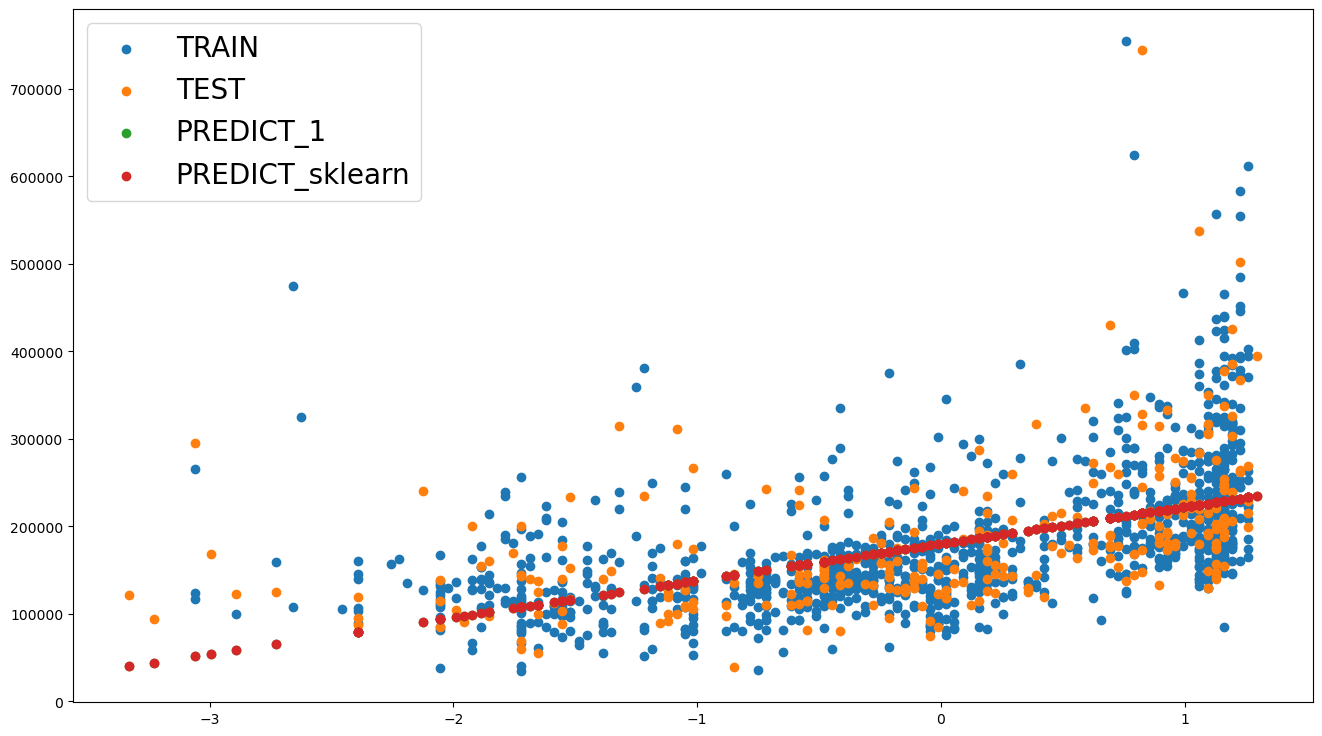

In [38]:
# sklearnを使用した予測データの視覚化
fig,ax = plt.subplots(figsize=(16,9))
print(X_train_s.shape,y_train.shape)
plt.rcParams["font.size"] = 20
plt.scatter(X_train_s,y_train,label="TRAIN")
plt.scatter(X_test_s,y_test,label="TEST")
plt.scatter(X_test_s,pre1,label="PREDICT_1")
plt.scatter(X_test_s,pre2,label="PREDICT_sklearn")
plt.legend()
plt.plot()

# 問題７　学習曲線

(1168, 1) (1168, 1)


[]

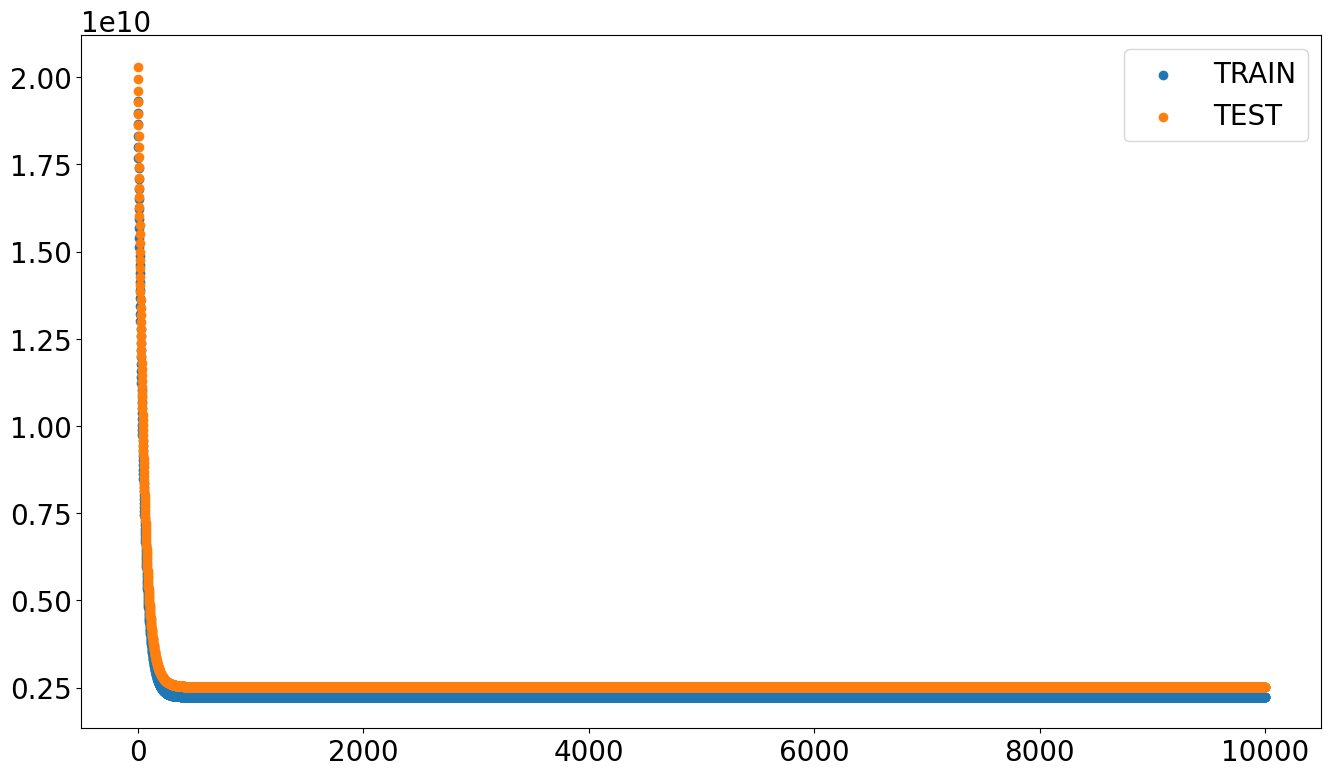

In [39]:
# sklearnを使用した予測データの視覚化
fig,ax = plt.subplots(figsize=(16,9))
print(X_train_s.shape,y_train.shape)
plt.rcParams["font.size"] = 20
plt.scatter(range(len(slr.loss)),slr.loss,label="TRAIN")
plt.scatter(range(len(slr.val_loss)),slr.val_loss,label="TEST")
plt.legend()
plt.plot()

# 問題8　bias項の削除

In [40]:
slr_nb = ScratchLinearRegression(num_iter=10000, lr=0.0001, no_bias=False, verbose=False)
slr_nb.fit(X_train_s, y_train, X_test_s, y_test)
pre3 = slr_nb.predict(X_test_s).reshape(-1,1)
print(pre3.shape)

(292, 1)


(1168, 1) (1168, 1)


[]

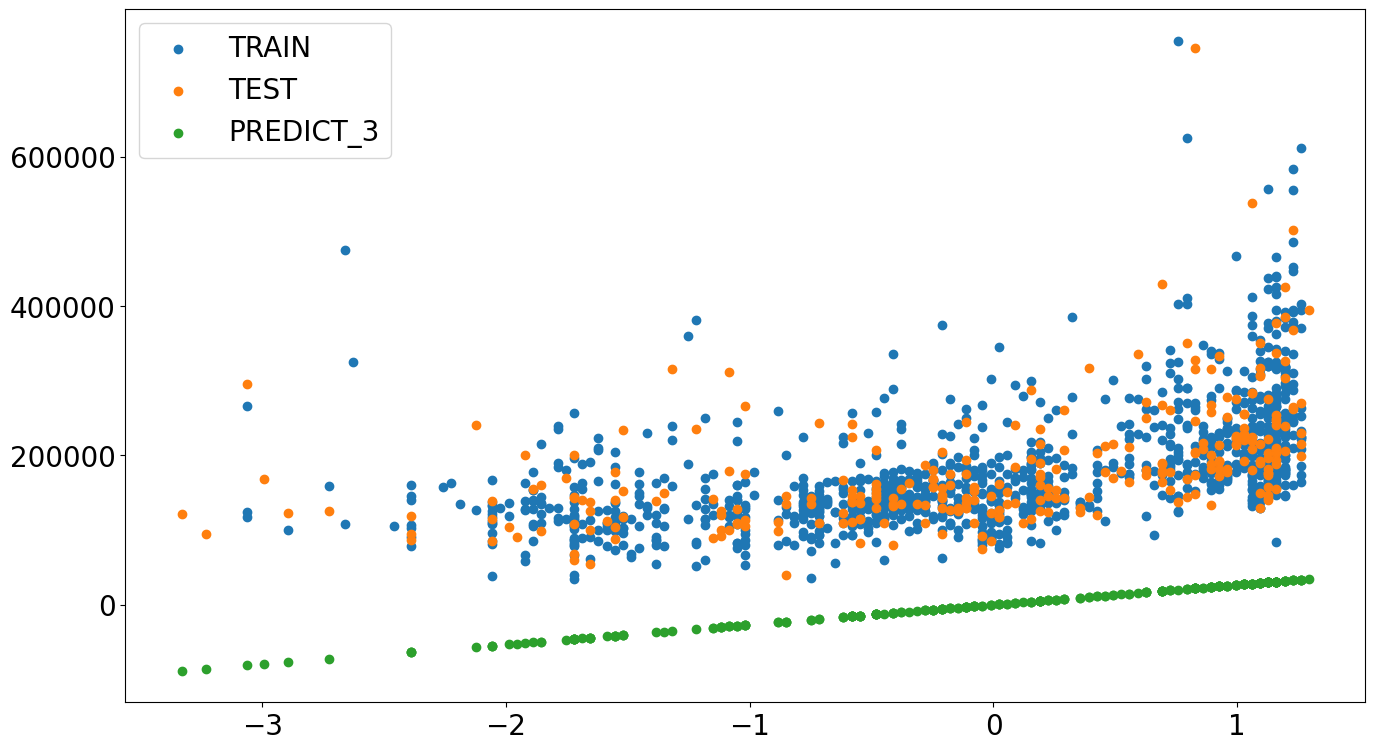

In [41]:
fig,ax = plt.subplots(figsize=(16,9))
print(X_train_s.shape,y_train.shape)
plt.rcParams["font.size"] = 20
plt.scatter(X_train_s,y_train,label="TRAIN")
plt.scatter(X_test_s,y_test,label="TEST")
plt.scatter(X_test_s,pre3,label="PREDICT_3")
plt.legend()
plt.plot()

## 考察
線形回帰のためグラフに表示したものを見るとわかる通り、バイアス項は一次関数の切片にあたるため、(0,0)を必ず通る直線になっている。そのため、値を求める際にはバイアス項は重要な要素であると考えられる。
バイアス自体の意味は、「学習アルゴリズムにおいて、誤差のうち、モデルの仮定の誤りに由来する(wikipedia)」とある。バイアス項があることによって、これを正しているのではないかと考える。

# 問題9　特徴量の多次元化

## 2乗

In [42]:
dataset = pd.read_csv("train.csv")
X = dataset.loc[:, ['YearBuilt','YearBuilt']]
y = dataset.loc[:, ['SalePrice']]
X = X.values
y = y.values
X[:,1] = X[:,1]**2
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
print('X_train.shape:',X_train.shape)
print('y_train.shape:',y_train.shape)
print('X_test.shape:',X_test.shape)
print('y_test.shape:',y_test.shape)

X_train.shape: (1168, 2)
y_train.shape: (1168, 1)
X_test.shape: (292, 2)
y_test.shape: (292, 1)


In [43]:
# 標準化
scaler = StandardScaler()
scaler.fit(X_train)

X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [44]:
slr_sq = ScratchLinearRegression(num_iter=10000, lr=0.01, no_bias=True, verbose=False)
slr_sq.fit(X_train_s, y_train, X_test_s, y_test)
pre4 = slr_sq.predict(X_test_s).reshape(-1,1)
print(pre4.shape)

(292, 1)


(1168, 2) (1168, 1)


[]

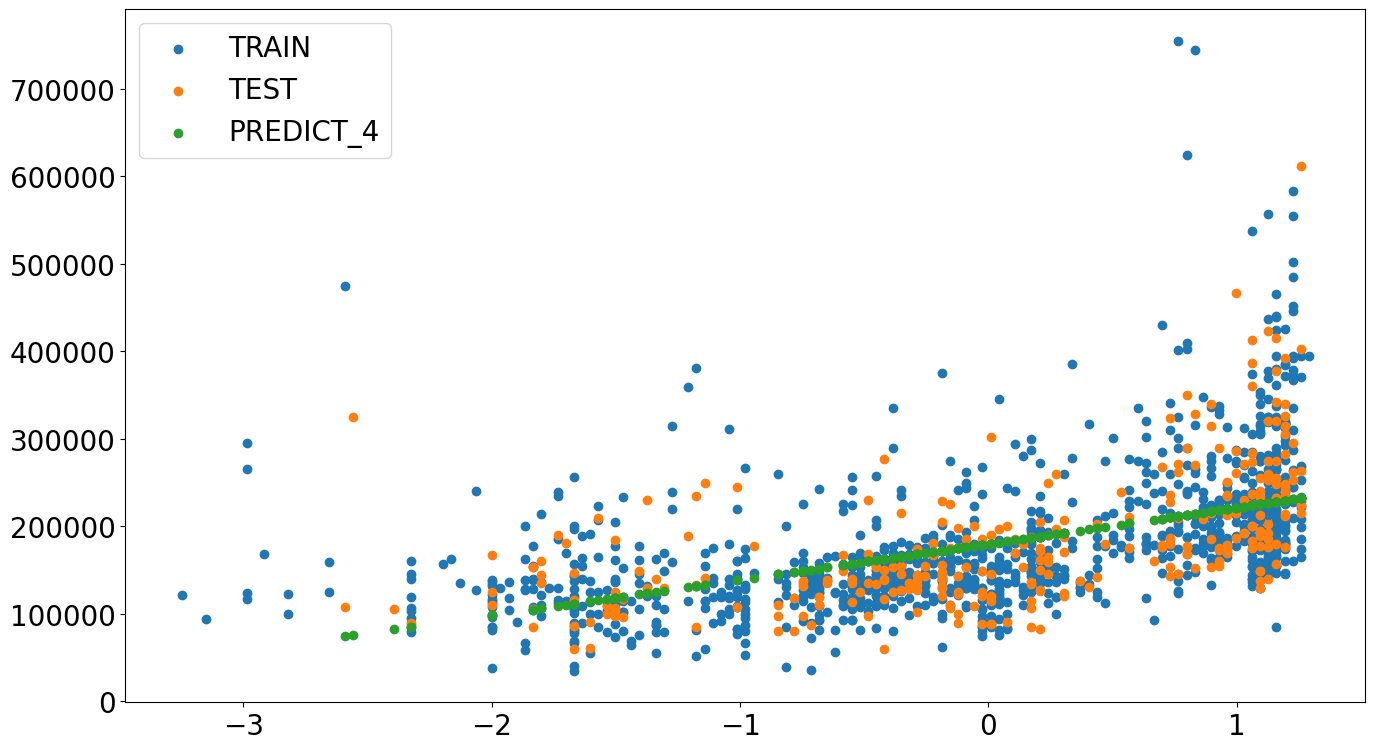

In [45]:
fig,ax = plt.subplots(figsize=(16,9))
print(X_train_s.shape,y_train.shape)
plt.rcParams["font.size"] = 20
plt.scatter(X_train_s[:,0],y_train,label="TRAIN")
plt.scatter(X_test_s[:,0],y_test,label="TEST")
plt.scatter(X_test_s[:,0],pre4,label="PREDICT_4")
plt.legend()
plt.plot()

[]

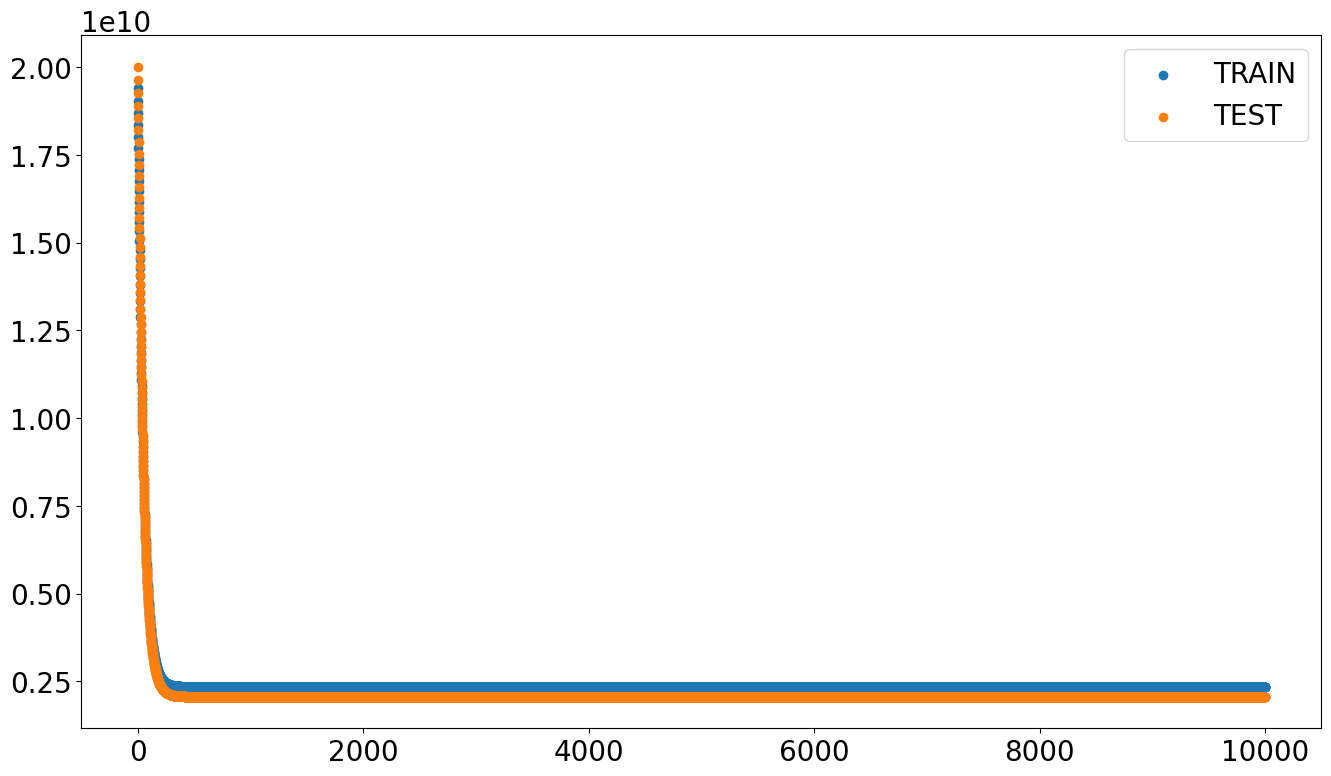

In [46]:
# sklearnを使用した予測データの視覚化
fig,ax = plt.subplots(figsize=(16,9))
plt.rcParams["font.size"] = 20
plt.scatter(range(len(slr_sq.loss)),slr_sq.loss,label="TRAIN")
plt.scatter(range(len(slr_sq.val_loss)),slr_sq.val_loss,label="TEST")
plt.legend()
plt.plot()

In [47]:
# 平均二乗誤差
print("自作プログラム2乗：平均二乗誤差MSE：",MSE(pre4,y_test))

自作プログラム2乗：平均二乗誤差MSE： 4120154187.530159


## 3乗

In [48]:
dataset = pd.read_csv("train.csv")
X = dataset.loc[:, ['YearBuilt','YearBuilt']]
y = dataset.loc[:, ['SalePrice']]
X = X.values
y = y.values
X[:,1] = X[:,1]**3
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
print('X_train.shape:',X_train.shape)
print('y_train.shape:',y_train.shape)
print('X_test.shape:',X_test.shape)
print('y_test.shape:',y_test.shape)

X_train.shape: (1168, 2)
y_train.shape: (1168, 1)
X_test.shape: (292, 2)
y_test.shape: (292, 1)


In [49]:
# 標準化
scaler = StandardScaler()
scaler.fit(X_train)

X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [50]:
slr_qu = ScratchLinearRegression(num_iter=10000, lr=0.01, no_bias=True, verbose=False)
slr_qu.fit(X_train_s, y_train, X_test_s, y_test)
pre5 = slr_qu.predict(X_test_s).reshape(-1,1)
print(pre5.shape)

(292, 1)


(1168, 2) (1168, 1)


[]

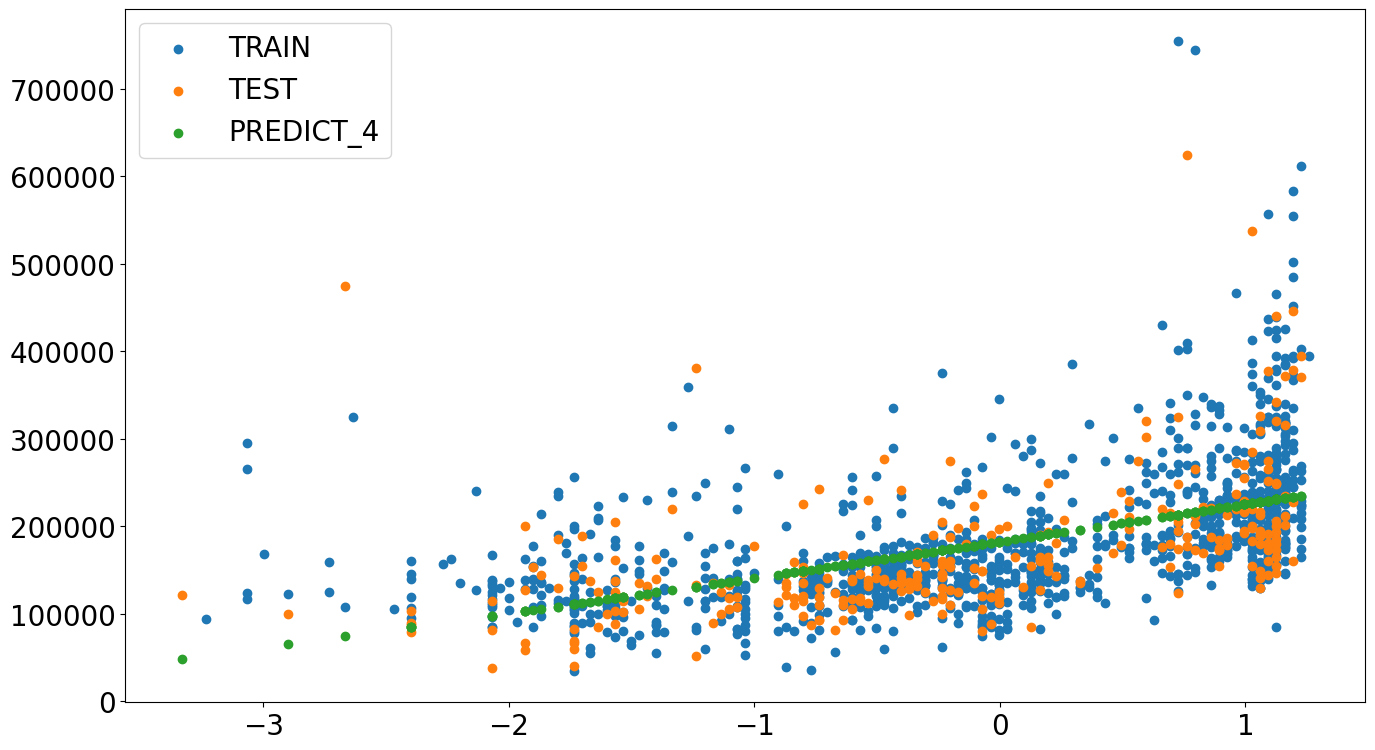

In [51]:
fig,ax = plt.subplots(figsize=(16,9))
print(X_train_s.shape,y_train.shape)
plt.rcParams["font.size"] = 20
plt.scatter(X_train_s[:,0],y_train,label="TRAIN")
plt.scatter(X_test_s[:,0],y_test,label="TEST")
plt.scatter(X_test_s[:,0],pre5,label="PREDICT_4")
plt.legend()
plt.plot()

[]

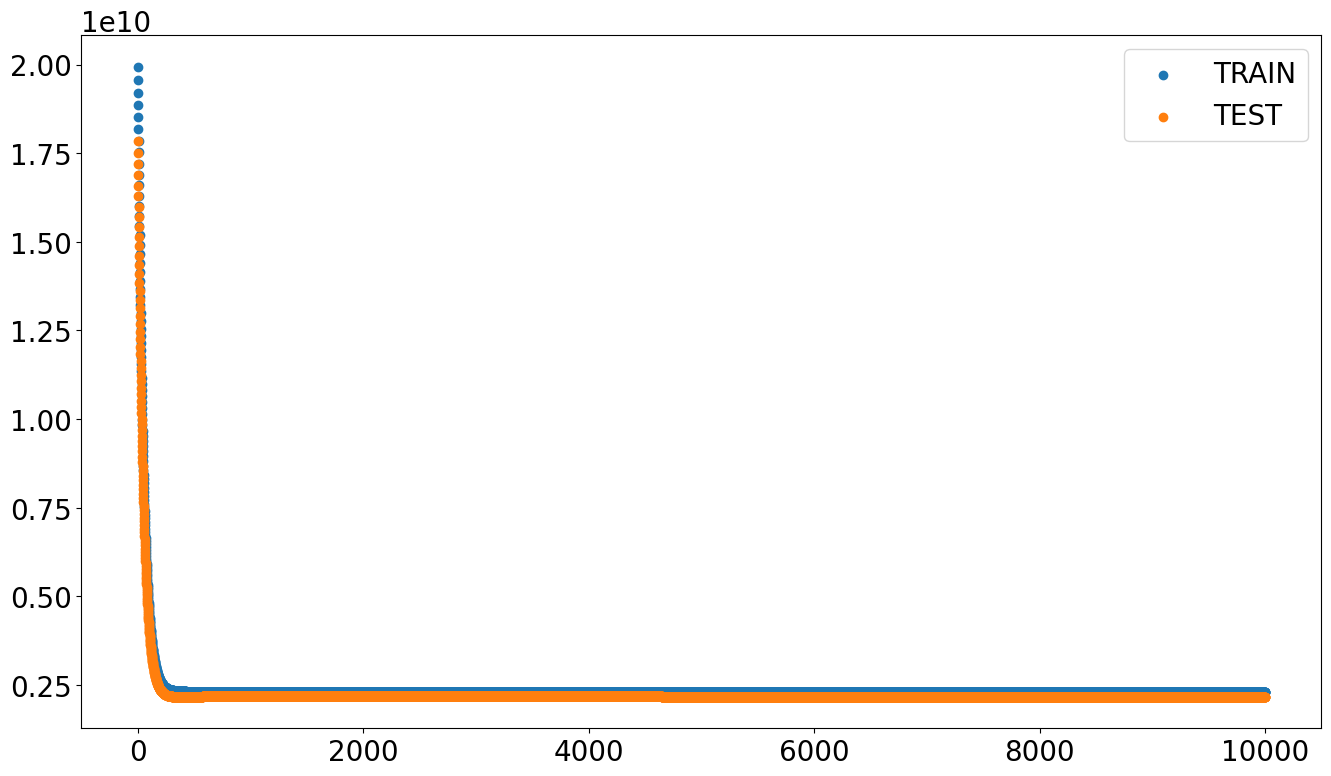

In [52]:
# sklearnを使用した予測データの視覚化
fig,ax = plt.subplots(figsize=(16,9))
plt.rcParams["font.size"] = 20
plt.scatter(range(len(slr_qu.loss)),slr_qu.loss,label="TRAIN")
plt.scatter(range(len(slr_qu.val_loss)),slr_qu.val_loss,label="TEST")
plt.legend()
plt.plot()

In [53]:
# 平均二乗誤差
print("自作プログラム3乗：平均二乗誤差MSE：",MSE(pre5,y_test))

自作プログラム3乗：平均二乗誤差MSE： 4340090280.713758


## 検証結果
特徴量を増やしたことで平均二乗誤差の値が小さくなった。このことから、精度が多少良くなったように見られる。

# 問題10　更新式の導出

損失関数の導関数$\frac{\partial}{\partial \theta_j}J(\theta)$を求める。
損失関数は提示されているのでそれを用いて計算していくと
$$
\frac{\partial}{\partial \theta_j}J(\theta) 
 = \frac{1}{2m}\frac{\partial}{\partial \theta_j} \Sigma_{i=1}^{n}(h_\theta(x^{(i)}) - y^{(i)})^{2} \\
 = \frac{1}{m}\Sigma_{i=1}^{n}(\frac{\partial}{\partial \theta_j}h_\theta(x^{(i)}) - \frac{\partial}{\partial \theta_j}y^{(i)}) \\
 = \frac{1}{m}\Sigma_{i=1}^{n}(h_\theta(x^{(i)})x^{(i)}_j - y^{(i)}x^{(i)}_j) \\
 = \frac{1}{m}\Sigma_{i=1}^{n}\bigl[(h_\theta(x^{(i)}) - y^{(i)})x^{(i)}_j\bigl] \\
$$
$\theta$の更新は学習率×傾きで行うので、先ほど計算したものを$\theta_j:=\theta_j - \alpha\frac{\partial}{\partial \theta_j}J(\theta) $に代入すると  
$$
\theta_j:=\theta_j - \alpha\frac{\partial}{\partial \theta_j}J(\theta) \\
 = \theta_j - \alpha\frac{1}{m}\Sigma_{i=1}^{n}\bigl[(h_\theta(x^{(i)}) - y^{(i)})x^{(i)}_j\bigl] \\
$$
となる。

# 問題11　局所最適解の問題

今回使用している損失関数は平均二乗誤差を用いている。これを下の図にプロットする

[]

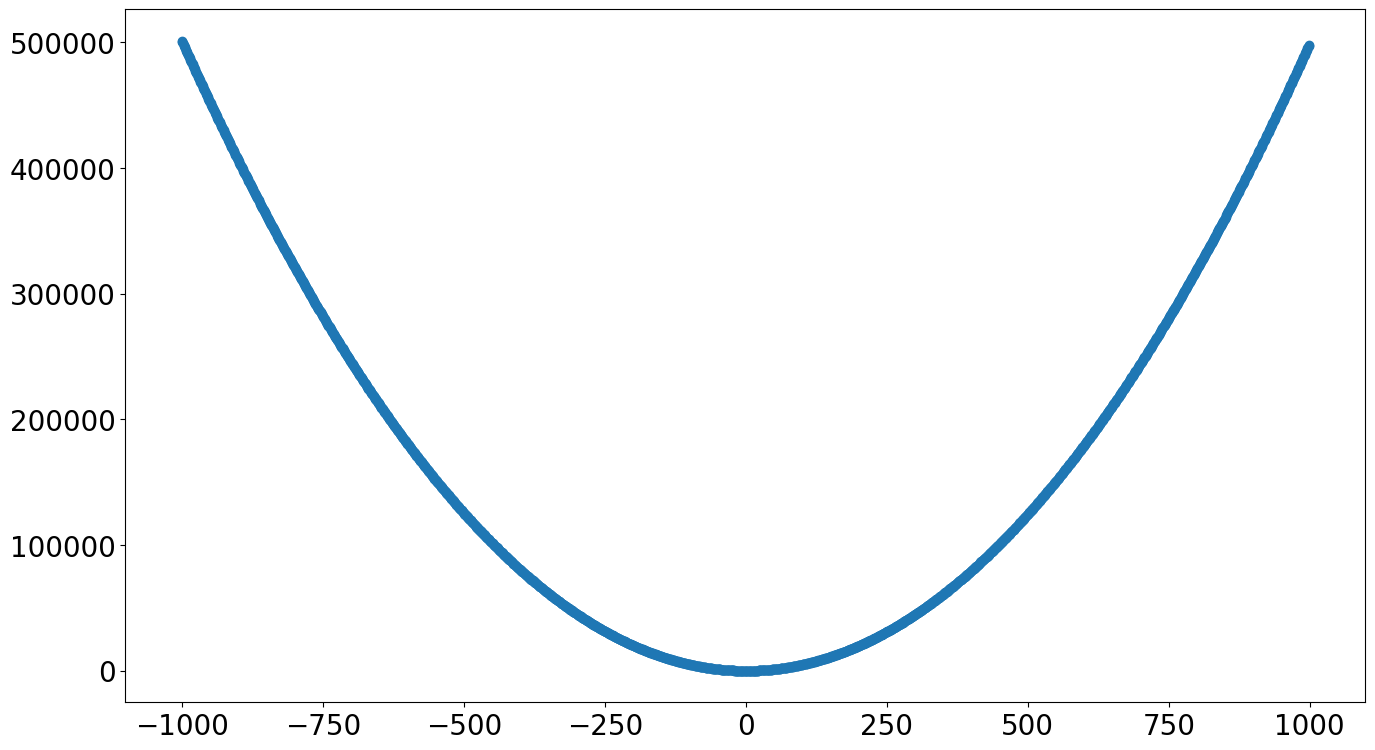

In [54]:
x = np.arange(-1000,1000,1) # 予測値
y = np.ones(x.shape[0]) # 真値
mse = 1/2*(x - y)**2
fig,ax = plt.subplots(figsize=(16,9))
plt.scatter(x,mse)
plt.plot()

上の図のように下に凸の関数で表すことができる。そのため、最適解を求めることができる。